El código anterior demuestra cómo se puede utilizar el algoritmo de búsqueda de Grover con LogicalExpressionOracle para encontrar una asignación satisfactoria para la instancia del problema Satisfiability (SAT) codificada en el formato DIMACS CNF. La cadena de entrada sat_cnf corresponde a la siguiente forma normal conjuntiva (CNF):

In [8]:
from qiskit import Aer
from qiskit.aqua.components.oracles import LogicalExpressionOracle
from qiskit.aqua.algorithms import Grover

In [9]:
sat_cnf = """
c Example DIMACS 3-sat
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0
"""
# (¬x1 ∨ ¬x2 ∨ ¬x3) ∧ (x1 ∨ ¬x2 ∨ x3) ∧ (x1 ∨ x2 ∨ ¬x3) ∧ (x1 ∨ ¬x2 ∨ ¬x3) ∧ (¬x1 ∨ x2 ∨ x3)


In [10]:
backend = Aer.get_backend('qasm_simulator')

In [11]:
oracle = LogicalExpressionOracle(sat_cnf)
algorithm = Grover(oracle)

In [12]:
result = algorithm.run(backend)
print(result.assignment)

[1, -2, 3]


El código Python anterior imprime una posible solución para este CNF. Por ejemplo, la salida 1, -2, 3 indica que la expresión lógica (x1 ∨ ¬x2 ∨ x3) satisface el CNF dado.

 # Grover
Búsqueda en una secuencia no ordenada de datos con N componentes.
Búsqueda en una lista no estructurada

´[0,1,2,...,w,...,N]´

√N


In [37]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

def build_grover_circuit(search_bits):

    qr = QuantumRegister(2)
    cr = ClassicalRegister(2)

    groverCircuit = QuantumCircuit(qr,cr,)
    groverCircuit.h(qr)
    groverCircuit.barrier()
    
    search = {
        "00": qr,
        "01": qr[0],
        "10": qr[1]
    }
    if search_bits != '11':
        groverCircuit.x(search[search_bits])
    
    groverCircuit.cz(qr[0],qr[1])

    if search_bits != '11':
        groverCircuit.x(search[search_bits])
    groverCircuit.barrier()
    
    
    groverCircuit.h(qr)
    groverCircuit.z(qr)
    groverCircuit.cz(qr[0],qr[1])
    groverCircuit.h(qr)
        
    return groverCircuit, qr, cr

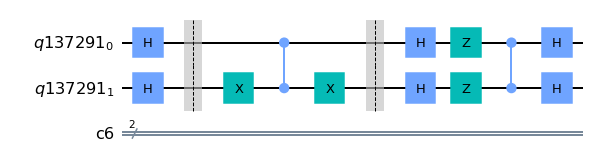

In [38]:
groverCircuit, qr, cr = build_grover_circuit('10')
groverCircuit.draw(output="mpl")


## Machine learning

In [13]:
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.algorithms import VQC
from qiskit.aqua.components.optimizers import COBYLA
from qiskit.aqua.components.feature_maps import RawFeatureVector
from qiskit.ml.datasets import wine
from qiskit.circuit.library import TwoLocal


In [21]:
seed = 1376
aqua_globals.random_seed = seed

In [22]:
# Use Wine data set for training and test data
feature_dim = 4  # dimension of each data point
_, training_input, test_input, _ = wine(training_size=12,
                                        test_size=4,
                                        n=feature_dim)


In [39]:
training_input.keys()

dict_keys(['A', 'B', 'C'])

In [23]:
training_input['A'][0]

array([-0.36427445, -0.03398871, -0.11167034, -0.37058717])

In [24]:
feature_map = RawFeatureVector(feature_dimension=feature_dim)
vqc = VQC(COBYLA(maxiter=100),
          feature_map,
          TwoLocal(feature_map.num_qubits, ['ry', 'rz'], 'cz', reps=3),
          training_input,
          test_input)

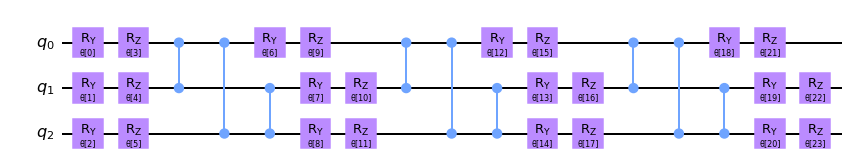

In [43]:
TwoLocal(3, ['ry', 'rz'], 'cz', reps=3).draw(output="mpl")

In [25]:
result = vqc.run(QuantumInstance(BasicAer.get_backend('statevector_simulator'),
                                 shots=1024, seed_simulator=seed, seed_transpiler=seed))


In [26]:
print('Testing accuracy: {:0.2f}'.format(result['testing_accuracy']))

Testing accuracy: 1.00


<img src=".\VQC.jpg"/>